  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %                                 ]  15.7 %                     ]  47.0 %Fetching: [=======================>                 ]  57.1 %>          ]  72.6 %====================================>    ]  88.3 % Resolving package versions...
 Installed Tables ───────── v0.2.3
 Installed ImageDistances ─ v0.2.4
 Installed ImageCore ────── v0.8.3
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [a09fc81d] ↑ ImageCore v0.8.2 ⇒ v0.8.3
  [51556ac3] ↑ ImageDistances v0.2.3 ⇒ v0.2.4
  [bd369af6] ↑ Tables v0.2.1 ⇒ v0.2.3


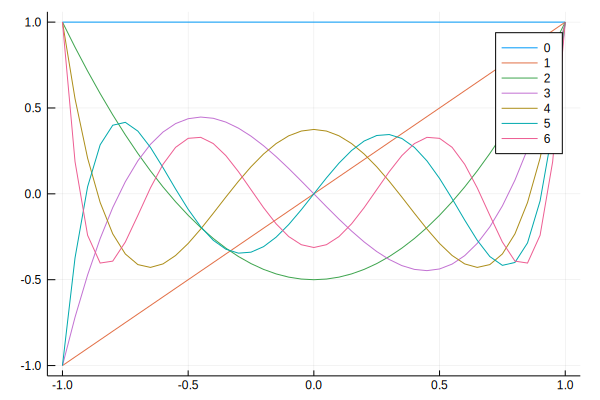

In [1]:
# ZAD 1
using Pkg, Plots
Pkg.add("QuadGK")

using QuadGK
using Polynomials

(xp,a)=gauss(Float64,7)

function legendre(k)
    if k == 0
        return Poly([1])
    end
    if k == 1
        return Poly([0, 1])
    end
    return (2*(k-1)+1)/(k) * Poly([0, 1]) * legendre(k-1) - ((k-1)/(k) * legendre(k-2))
end
    
x = -1:0.05:1
plot_ = plot(x, polyval(legendre(0), x), label="0")
for i in 1:6
    plot!(x, polyval(legendre(i), x), label=string(i))
end
plot_



In [2]:
for i in 2:4
    display("Roots of legendre ")
    display(i)
    (xp,a)=gauss(Float64,i)
    display(xp)
    display(roots(legendre(i)))
end

"Roots of legendre "

2

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896258

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896256

"Roots of legendre "

3

3-element Array{Float64,1}:
 -0.7745966692414834
  0.0               
  0.7745966692414834

3-element Array{Float64,1}:
 -0.7745966692414834
  0.7745966692414833
  0.0               

"Roots of legendre "

4

4-element Array{Float64,1}:
 -0.8611363115940526
 -0.3399810435848563
  0.3399810435848563
  0.8611363115940526

4-element Array{Float64,1}:
 -0.8611363115940536 
  0.8611363115940531 
 -0.33998104358485653
  0.3399810435848563 

In [37]:
# ZAD 2

function integrate(f, k)
    (xp,a)=gauss(Float64,k)
    return sum(a .* f.(xp))
end

f(x) = x^5 + x^4
# (x^6/6 + x^5/5) x = -1 to x = 1
# 1/6 + 1/5 - (1/6 - 1/5) = 2/5 = 0.4

println("x^5 + x^4")
println("Poprawny wynik")
println(0.4)
println()
println("k=1 ", integrate(f, 1))
println("k=2 ", integrate(f, 2))
println("k=3 ", integrate(f, 3))
println("k=4 ", integrate(f, 4))
println("k=5 ", integrate(f, 5))

# można uzyskać stopień dokładności 2n−1 (w przypadku n-punktowej kwadratury)

x^5 + x^4
Poprawny wynik
0.4

k=1 0.0
k=2 0.22222222222222232
k=3 0.40000000000000013
k=4 0.4000000000000002
k=5 0.4000000000000001


In [38]:
# ZAD 3
function integrate(f, k, a, b)
    g(z) = f((b+a)/2 + ((b-a)/2)*z) * (b-a)/2
    return integrate(g, k)
end

f(x) = x^5 + x^4
println("x^5 + x^4")
#integration from -1 to 1 = 0.4
println("from -1 to 1")
println("k=3 ", integrate(f, 3, -1, 1))
#integration from -2 to 2 = 12.8
println("from -2 to 2")
println("k=2 ", integrate(f, 2, -2, 2))
println("k=3 ", integrate(f, 3, -2, 2))
println("k=4 ", integrate(f, 4, -2, 2))



x^5 + x^4
from -1 to 1
k=3 0.40000000000000013
from -2 to 2
k=2 7.111111111111113
k=3 12.800000000000004
k=4 12.800000000000008


In [45]:
# ZAD 4
using QuadGK
f(x) = x^5 + x^4
println("x^5 + x^4")
println(quadgk(f, -1, 1))

println("rozkład normalny Gaussa od -inf do inf")
g(x) = 1 / sqrt(2*pi) * exp((-x^2) / 2)
println(quadgk(g, -Inf, Inf))


x^5 + x^4
(0.39999999999999997, 5.551115123125783e-17)
rozkład normalny Gaussa od -inf do inf
(1.0000000000032583, 1.4395584941504537e-8)


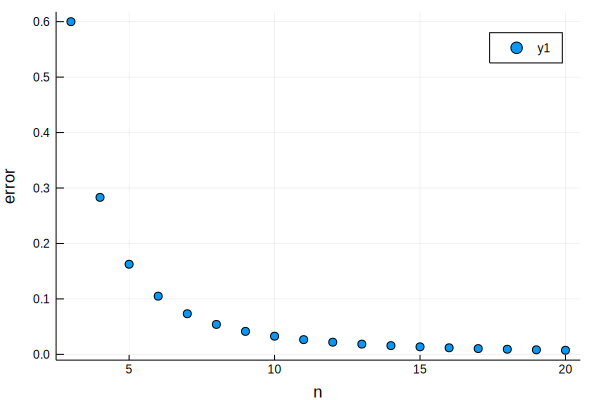

In [65]:
# ZAD 5
function trapezoidalRule(f, n, a, b)
    sum = 0
    delta = (b-a)/(n-1)
    a_ = a
    for i in 1:(n-1)
        sum = sum + 1/2 * (f(a_) + f(a_+delta)) * delta
        a_ = a_ + delta
    end
    return sum
end

f(x) = x^5 + x^4
real_solution = 0.4

trapezoidalRule(f, 6, -1, 1)

err = []
xs = 3:20
for i in xs
    push!(err, abs(real_solution - trapezoidalRule(f, i, -1, 1)))
end
scatter(xs, err, xlabel="n", ylabel="error")    
